In [74]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os
print("Working directory:", os.getcwd())
hotCode='1I3'   

df = pd.read_csv('../data/'+hotCode+'/Indicateurs.csv', sep=';')
print("Valeurs nulles par colonne dans df :")

df.fillna(0, inplace=True)




df = df[df['ObsDate'] == df['Date']]
df = df.reset_index(drop=True)

# Sélection des indicateurs utiles
X = df[['To', 'Pm', 'CaH', 'Ant', 'Chv', 'Libres']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42)
df['SeasonCluster'] = kmeans.fit_predict(X_scaled)

# Interprétation des clusters (automatique)
cluster_summary = df.groupby('SeasonCluster')[['To','Pm','CaH']].mean()
print(cluster_summary)
df

Working directory: c:\github\ml-demande\demande\saison
Valeurs nulles par colonne dans df :
                     To          Pm          CaH
SeasonCluster                                   
0              0.948137  320.496720  9367.776064
1              0.785872  260.374242  6248.753011
2              0.463260  238.434369  3451.966847


c:\Users\KAR.SACI\AppData\Local\anaconda3\envs\env_cd_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


,hotCode,Date,ObsDate,Chv,Clx,Sel,Libres,Construites,Ca,CaH,To,Pm,revpz,Gt,Te,Ant,Ds,SeasonCluster
0,1I3,2022-01-01,2022-01-01,22,0,22,6,31,6472.40,6195.40,0.7097,281.61,199.85,0,3,36.0,2.50,1
1,1I3,2022-01-02,2022-01-02,12,0,12,11,31,2716.67,2557.67,0.3871,213.14,82.51,0,8,0.0,0.00,2
2,1I3,2022-01-03,2022-01-03,16,0,16,13,31,3566.40,3339.40,0.5161,208.71,107.72,0,2,29.0,2.38,2
3,1I3,2022-01-04,2022-01-04,16,0,16,12,31,3926.83,3741.83,0.5161,233.86,120.70,0,3,0.0,3.67,2
4,1I3,2022-01-05,2022-01-05,10,0,10,18,31,2088.80,1884.80,0.3226,188.48,60.80,0,3,1.0,1.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,1I3,2025-10-02,2025-10-02,29,24,53,2,31,11027.42,9998.22,0.9355,344.77,322.52,0,0,50.0,2.23,0
1371,1I3,2025-10-03,2025-10-03,31,20,51,0,31,13461.63,12209.63,1.0000,393.86,393.86,0,0,77.0,2.69,0
1372,1I3,2025-10-04,2025-10-04,31,10,41,0,31,12763.20,11600.10,1.0000,374.20,374.20,0,0,222.0,3.00,0
1373,1I3,2025-10-05,2025-10-05,31,6,37,0,31,11494.56,10490.46,1.0000,338.40,338.40,0,0,93.0,2.78,0


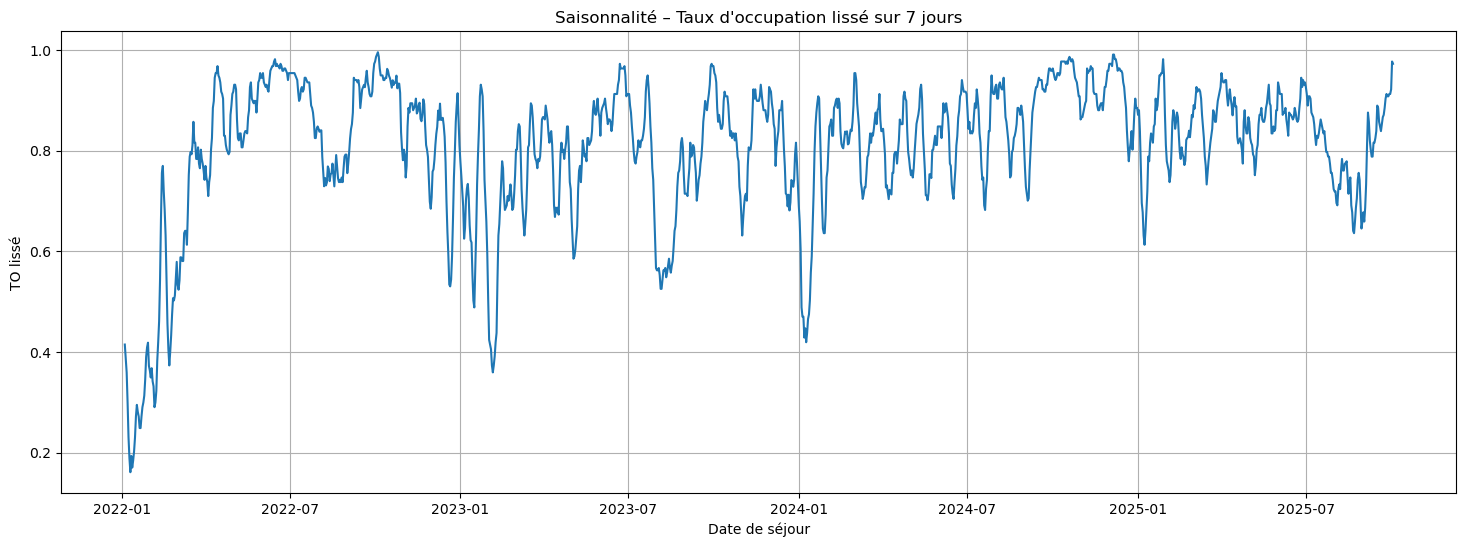

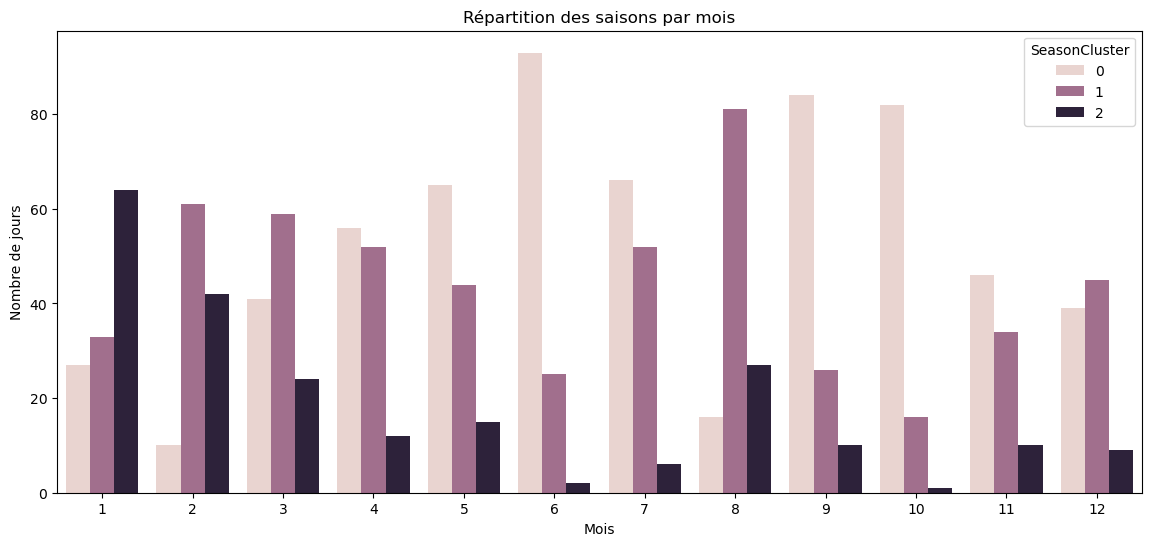

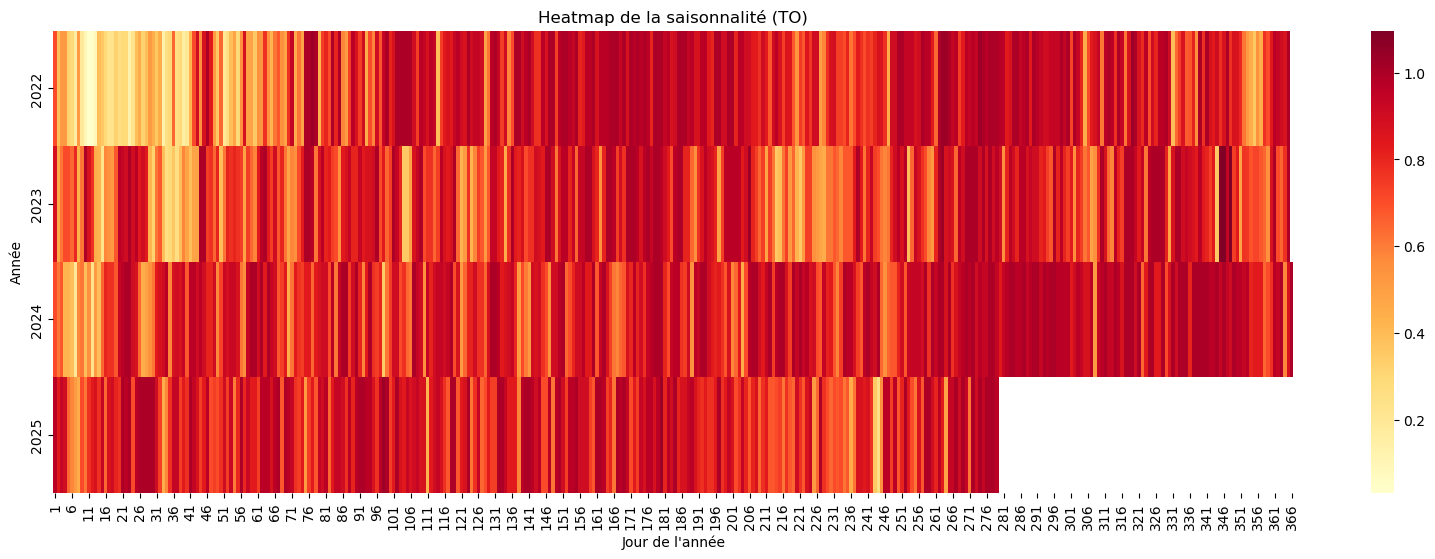

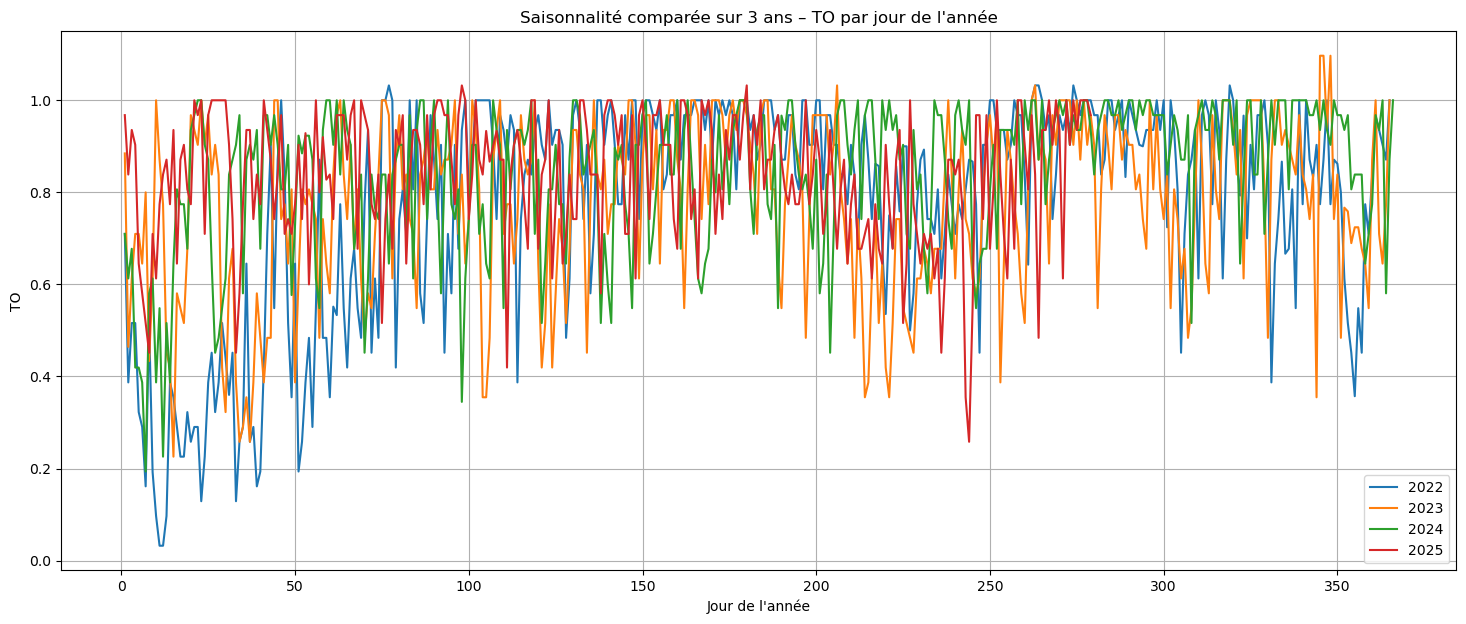

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Moyenne lissée glissante sur 7 jours
df['To_smooth'] = df['To'].rolling(window=7, center=True).mean()

plt.figure(figsize=(18,6))
plt.plot(df['Date'], df['To_smooth'])
plt.title("Saisonnalité – Taux d'occupation lissé sur 7 jours")
plt.xlabel("Date de séjour")
plt.ylabel("TO lissé")
plt.grid(True)
plt.show()

df['Month'] = df['Date'].dt.month

plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Month', hue='SeasonCluster')
plt.title("Répartition des saisons par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de jours")
plt.show()

df['Year'] = df['Date'].dt.year
df['DayOfYear'] = df['Date'].dt.dayofyear

pivot = df.pivot(index='Year', columns='DayOfYear', values='To')

plt.figure(figsize=(20,6))
sns.heatmap(pivot, cmap="YlOrRd", cbar=True)
plt.title("Heatmap de la saisonnalité (TO)")
plt.xlabel("Jour de l'année")
plt.ylabel("Année")
plt.show()


df['Year'] = df['Date'].dt.year
df['DayOfYear'] = df['Date'].dt.dayofyear

plt.figure(figsize=(18,7))
for year in sorted(df['Year'].unique()):
    subset = df[df['Year'] == year]
    plt.plot(subset['DayOfYear'], subset['To'], label=str(year))

plt.title("Saisonnalité comparée sur 3 ans – TO par jour de l'année")
plt.xlabel("Jour de l'année")
plt.ylabel("TO")
plt.legend()
plt.grid(True)
plt.show()




In [83]:
i


Valeurs nulles par colonne dans df :


AttributeError: Can only use .dt accessor with datetimelike values

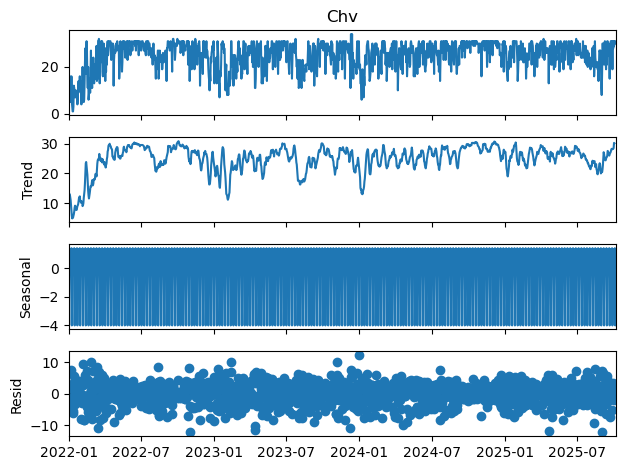

In [60]:
df['Date'] = pd.to_datetime(df['Date'])
# On trie les données par date (juste au cas où)
df = df.sort_values('Date')
# On créé la série temporelle y(t) = chambres vendues
y = df.set_index('Date')['Chv']


import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(y)
res.plot()
plt.show()


In [84]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1. Chargement des données
# -------------------------------------------------------------
df = pd.read_csv("hotel_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

# -------------------------------------------------------------
# 2. Construire un profil moyen par "jour de l'année" (1..365)
# -------------------------------------------------------------
df['DayOfYear'] = df['Date'].dt.dayofyear

# Indicateurs utiles : TO ou CaH ou PM
metric = "To"

profile = (
    df.groupby('DayOfYear')[metric]
    .mean()
    .reindex(range(1,366))
    .interpolate()  # interpoler les jours manquants
)

# -------------------------------------------------------------
# 3. Lissage avancé (Savitzky-Golay)
# -------------------------------------------------------------
# fenêtre = 21 jours, ordre = 3
smooth = savgol_filter(profile.values, window_length=21, polyorder=3)

# -------------------------------------------------------------
# 4. Normalisation 0–100 (indice saisonnier)
# -------------------------------------------------------------
scaler = MinMaxScaler(feature_range=(0, 100))
season_index = scaler.fit_transform(smooth.reshape(-1,1)).flatten()

# -------------------------------------------------------------
# 5. Clustering NON SUPERVISÉ (3 saisons)
# -------------------------------------------------------------
X = season_index.reshape(-1,1)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Ordonnancer les clusters du plus faible au plus fort
order = np.argsort(kmeans.cluster_centers_.flatten())
label_map = {old: new for new, old in enumerate(order)}
season_labels = np.vectorize(label_map.get)(labels)

# 0 = basse, 1 = moyenne, 2 = haute
season_names = np.where(season_labels == 2, "Haute",
                np.where(season_labels == 1, "Moyenne", "Basse"))

# -------------------------------------------------------------
# 6. Reconstruction de périodes continues
# -------------------------------------------------------------
def extract_periods(day_labels):
    periods = []
    current_season = day_labels[0]
    start_day = 1

    for day in range(2, 366):
        if day_labels[day-1] != current_season:
            periods.append((start_day, day-1, current_season))
            start_day = day
            current_season = day_labels[day-1]

    periods.append((start_day, 365, current_season))
    return periods

periods = extract_periods(season_labels)

# -------------------------------------------------------------
# 7. Correction professionnelle RMS :
#    Fusion des segments trop courts (< 14 jours)
# -------------------------------------------------------------
def merge_short_segments(periods, min_len=14):
    merged = []

    for i, (s, e, lab) in enumerate(periods):
        if (e - s + 1) < min_len:
            # trop court : fusionner avec segment précédent si possible
            if merged:
                prev_s, prev_e, prev_lab = merged[-1]
                merged[-1] = (prev_s, e, prev_lab)
            else:
                # fusionner avec le suivant
                next_s, next_e, next_lab = periods[i+1]
                merged.append((s, next_e, next_lab))
        else:
            merged.append((s, e, lab))

    return merged

clean_periods = merge_short_segments(periods)

# -------------------------------------------------------------
# 8. Convertir DOY → Dates réelles
#     (exemple pour l'année 2025, adaptable)
# -------------------------------------------------------------
base_year = 2025

result_periods = []
for s, e, lab in clean_periods:
    start_date = pd.to_datetime(f"{base_year}-01-01") + pd.Timedelta(days=s-1)
    end_date   = pd.to_datetime(f"{base_year}-01-01") + pd.Timedelta(days=e-1)
    name = ["Basse", "Moyenne", "Haute"][lab]
    result_periods.append((start_date.date(), end_date.date(), name))

result_df = pd.DataFrame(result_periods, columns=["Début", "Fin", "Saison"])

print("\n===== SAISONS CALCULÉES =====\n")
print(result_df)

# -------------------------------------------------------------
# 9. Visualisation professionnelle
# -------------------------------------------------------------
plt.figure(figsize=(18,6))

# Courbe saisonnière lissée
plt.plot(range(1,366), season_index, color="black", linewidth=2, label="Indice saisonnier")

# Coloration par saison
colors = {0: "skyblue", 1: "gold", 2: "tomato"}

for s, e, lab in clean_periods:
    plt.axvspan(s, e, alpha=0.3, color=colors[lab])

plt.title("Profil de saisonnalité – Version professionnelle RMS")
plt.xlabel("Jour de l'année")
plt.ylabel("Indice saisonnier (0-100)")
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'hotel_data.csv'

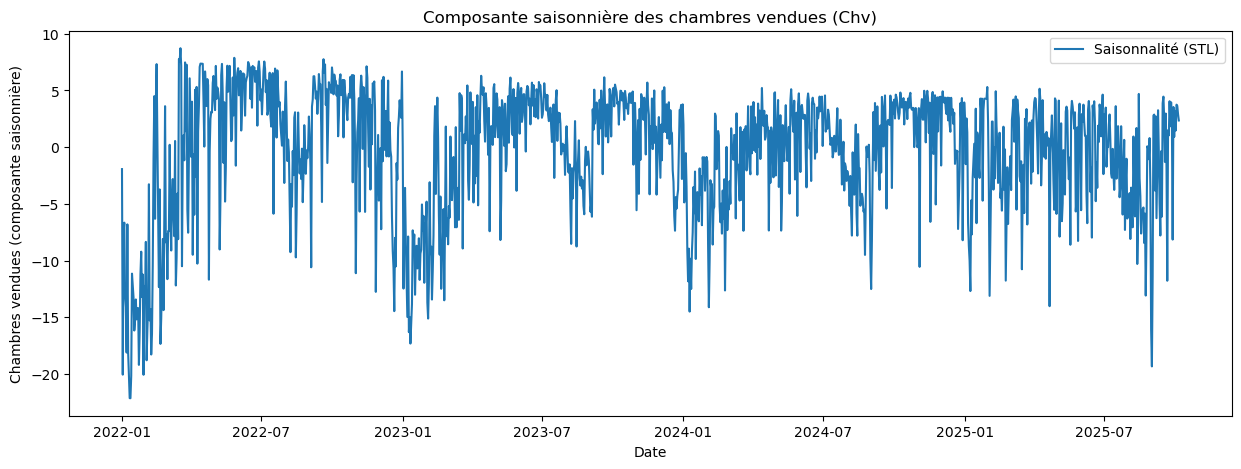

Périodes de Saisonnalité HAUTE (max saisonnalité):
2022-03-18

Périodes de Saisonnalité BASSE (min saisonnalité):
2022-01-12


In [51]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Conversion des dates
df['Date'] = pd.to_datetime(df['Date'])

# On trie les données par date (juste au cas où)
df = df.sort_values('Date')

# On créé la série temporelle y(t) = chambres vendues
y = df.set_index('Date')['Chv']


stl = STL(
    y,
    period=365,   # impose saisonnalité annuelle
    seasonal=31,  # fenêtre de lissage
    robust=True
)
res = stl.fit()


seasonal = res.seasonal

# Visualisation du composant saisonnier
plt.figure(figsize=(15,5))
plt.plot(seasonal, label='Saisonnalité (STL)')
plt.title('Composante saisonnière des chambres vendues (Chv)')
plt.xlabel('Date')
plt.ylabel('Chambres vendues (composante saisonnière)')
plt.legend()
plt.show()

# Analyse des max/min : périodes hautes/faibles
seasonal_max_dates = seasonal[seasonal == seasonal.max()].index
seasonal_min_dates = seasonal[seasonal == seasonal.min()].index

print("Périodes de Saisonnalité HAUTE (max saisonnalité):")
for dt in seasonal_max_dates:
    print(dt.strftime('%Y-%m-%d'))

print("\nPériodes de Saisonnalité BASSE (min saisonnalité):")
for dt in seasonal_min_dates:
    print(dt.strftime('%Y-%m-%d'))



In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# ---------------------------------------------------
# 1) Charger le fichier CSV
# ---------------------------------------------------

df = pd.read_csv(f'../data/{hotCode}/Indicateurs.csv', sep=';')
df = df[df['ObsDate'] == df['Date']]
df = df.reset_index(drop=True)

df["Date"] = pd.to_datetime(df["Date"])



# S'assurer que le tri est bon
df = df.sort_values("Date")

# # ---------------------------------------------------
# # 2) Préparer la série quotidienne
# # ---------------------------------------------------
df = df.set_index("Date").asfreq("D")          # impose fréquence journalière
df["Chv"] = df["Chv"].interpolate()            # interpolation si trous

# df["Chv"] = df["Chv"].ffill().bfill()

df
# # La série à analyser

y = df["Chv"]


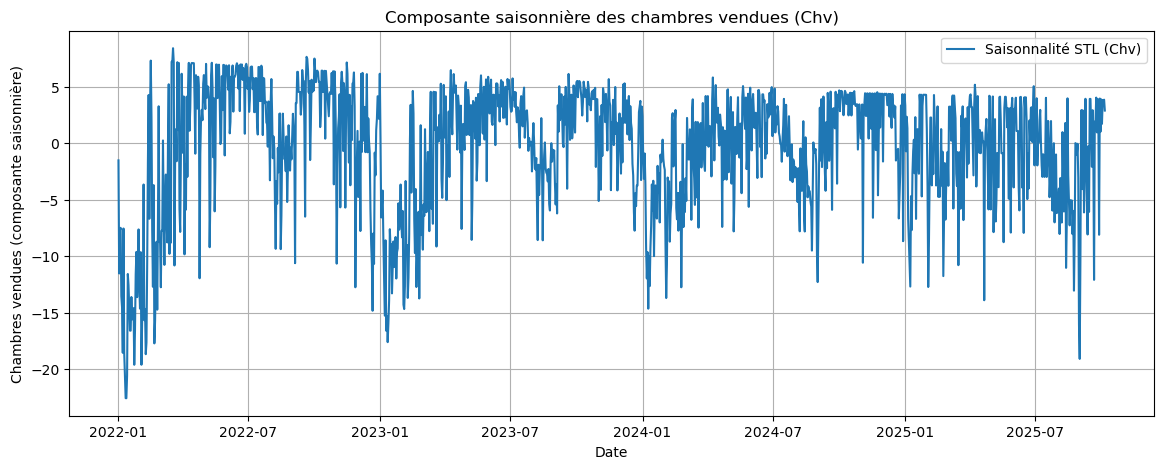

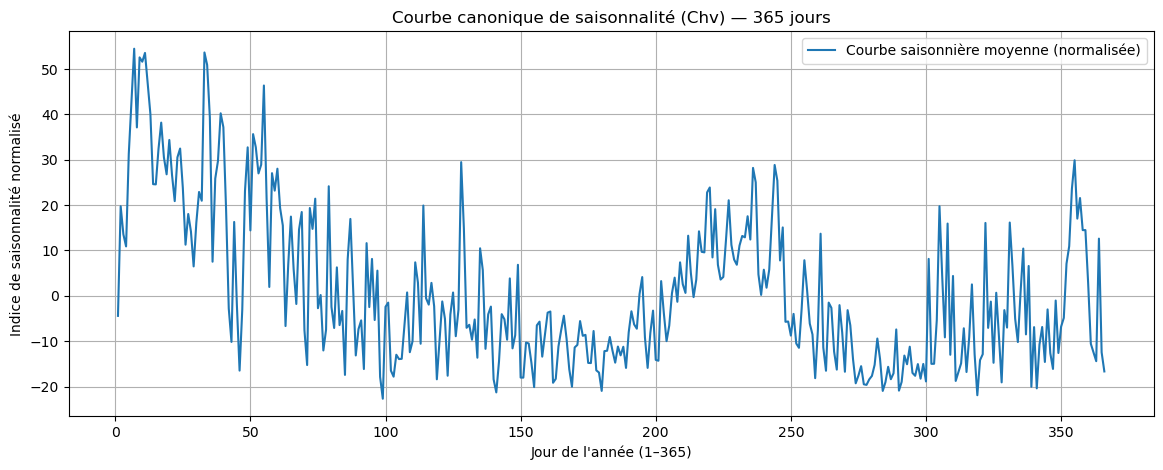

Courbe saisonnière exportée dans courbe_saison_chv_365.csv


In [53]:


# ---------------------------------------------------
# 3) Appliquer STL (saison annuelle uniquement)
# ---------------------------------------------------
stl = STL(y, period=365, robust=True)
res = stl.fit()

seasonal = res.seasonal
trend = res.trend
residual = res.resid

df["Seasonal"] = seasonal

# ---------------------------------------------------
# 4) Construire une courbe de saisonnalité canonique (1–365)
# ---------------------------------------------------
df["day_of_year"] = df.index.dayofyear

# On aligne toutes les années et on fait la moyenne par jour 1..365
season_curve = df.groupby("day_of_year")["Seasonal"].mean()

# Normalisation (optionnelle mais recommandée en RM)
season_curve_norm = season_curve / season_curve.mean()

# ---------------------------------------------------
# 5) Graphe : composante saisonnière
# ---------------------------------------------------
plt.figure(figsize=(14, 5))
plt.plot(df.index, df["Seasonal"], label="Saisonnalité STL (Chv)")
plt.title("Composante saisonnière des chambres vendues (Chv)")
plt.xlabel("Date")
plt.ylabel("Chambres vendues (composante saisonnière)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------
# 6) Graphe : courbe canonique 365 jours
# ---------------------------------------------------
plt.figure(figsize=(14, 5))
plt.plot(season_curve_norm.index, season_curve_norm.values, label="Courbe saisonnière moyenne (normalisée)")
plt.title("Courbe canonique de saisonnalité (Chv) — 365 jours")
plt.xlabel("Jour de l'année (1–365)")
plt.ylabel("Indice de saisonnalité normalisé")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------
# 7) Export de la courbe saisonnière (si tu veux l'utiliser en RMS)
# ---------------------------------------------------
season_curve_norm.to_csv("courbe_saison_chv_365.csv", sep=";")
print("Courbe saisonnière exportée dans courbe_saison_chv_365.csv")



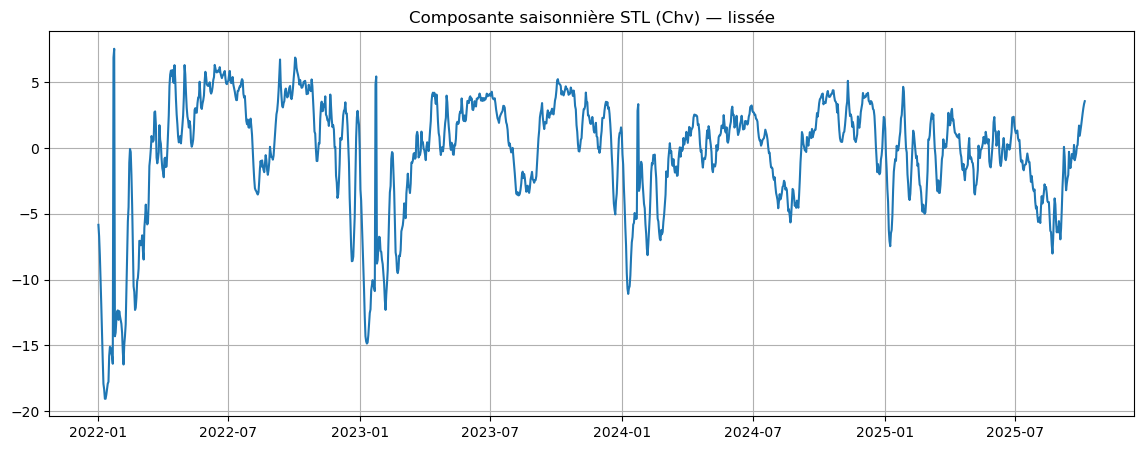

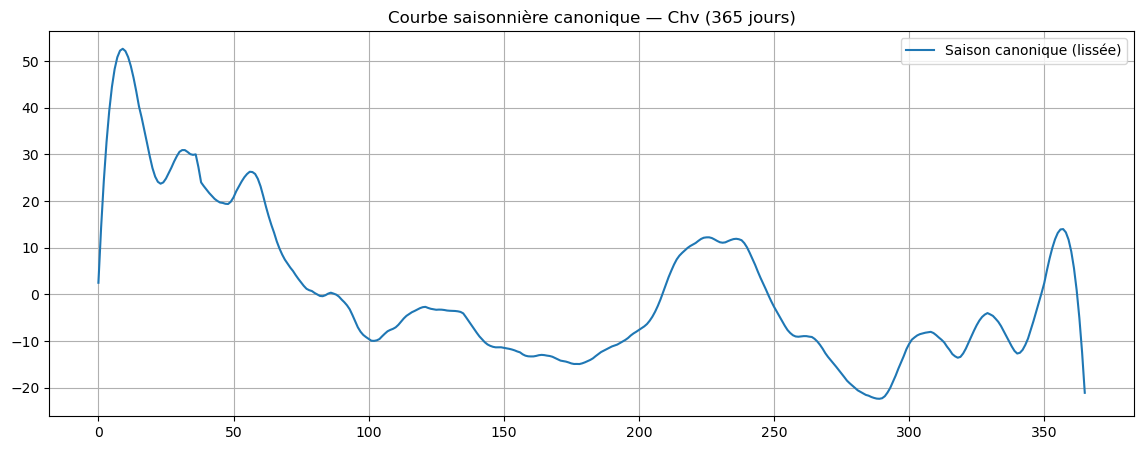

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from scipy.signal import savgol_filter

# ---------------------------------------------------
# 1. Charger données
# ---------------------------------------------------



df = pd.read_csv(f'../data/{hotCode}/Indicateurs.csv', sep=';')
df = df[df['ObsDate'] == df['Date']]
df = df.reset_index(drop=True)


# Convertir date si non converti
df["Date"] = pd.to_datetime(df["Date"])

# ---------------------------------------------------
# 2. Série quotidienne complète
# ---------------------------------------------------
df = df.set_index("Date").asfreq("D")
df["Chv"] = df["Chv"].interpolate()

# ---------------------------------------------------
# 3. Supprimer / corriger les valeurs aberrantes
# ---------------------------------------------------
q1, q3 = df["Chv"].quantile([0.10, 0.90])
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df["Chv"] = np.clip(df["Chv"], lower, upper)

# ---------------------------------------------------
# 4. Lissage Savitzky-Golay (15 jours)
# ---------------------------------------------------
df["Chv_smooth"] = savgol_filter(df["Chv"], window_length=15, polyorder=3)

# ---------------------------------------------------
# 5. STL (saison annuelle uniquement)
# ---------------------------------------------------
stl = STL(df["Chv_smooth"], period=365, robust=True)
res = stl.fit()

df["Seasonal"] = res.seasonal
df["Trend"] = res.trend

# ---------------------------------------------------
# 6. Normalisation annuelle
# ---------------------------------------------------
df["Year"] = df.index.year
df["Season_adj"] = df["Seasonal"] / df.groupby("Year")["Seasonal"].transform("mean")

# ---------------------------------------------------
# 7. Courbe canonique 365 jours
# ---------------------------------------------------
df["day_of_year"] = df.index.dayofyear
season_curve = df.groupby("day_of_year")["Season_adj"].mean()

# Lissage final de la courbe saisonnière
season_curve_smooth = savgol_filter(season_curve, window_length=31, polyorder=3)

# ---------------------------------------------------
# 8. Graphiques
# ---------------------------------------------------
plt.figure(figsize=(14, 5))
plt.plot(df.index, df["Seasonal"])
plt.title("Composante saisonnière STL (Chv) — lissée")
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(season_curve_smooth, label="Saison canonique (lissée)")
plt.title("Courbe saisonnière canonique — Chv (365 jours)")
plt.grid(True)
plt.legend()
plt.show()


In [48]:
from sklearn.cluster import KMeans
import numpy as np

values = season_curve_smooth.reshape(-1, 1)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(values)

# labels = 0,1,2 (clusters)
df_season = pd.DataFrame({
    "day_of_year": np.arange(1, 366),
    "season_index": season_curve_smooth,
    "cluster": labels
})

# On renomme les clusters du plus faible au plus fort
df_season["cluster"] = df_season["season_index"].rank().astype(int) // (365//3)


c:\Users\KAR.SACI\AppData\Local\anaconda3\envs\env_cd_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


ValueError: All arrays must be of the same length